<a href="https://colab.research.google.com/github/Subhangee19/DataAnalysis/blob/main/GH1040365_DataVisualisationFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M512 Data Visualization and Communication - Final Project

## Lavender Dreams - Sleep, Stress and Health:
### An Effective Analysis from Lifestyle and health Data

Subhangee Bhattacharjee

GH1040365

M512A

Data Visualization and Communication

# 1. Context
Problem Statement: Inconsistent sleep or irregular sleeping patterns are draining people's energy, productivity and wellbeing. Lack of knowledge about necessity of sleep and how it may lead to serious disorders and diseases among individuals also arises the problem of rise of such disorders. It is important to reduce fatigue and health risks by imrpoving sleeping habits

Why this analysis is required:
Lavender Dreams being a wellbeing company for workplace that focuses on better sleep, reduce stress and encourage healthy habits partners with employers to run stress-management workshops, sleep coachings etc. Thus, it wants to address the above-mentioned problems which are a part of our daily routine and analyse lifestyle data to turn it into decision-ready insights so leaders target the support where it will matter the most.

Since this data visualisation will be paired with a compelling story and the problem statement is a real life problem, to make it relatable it is best to introduce a persona - Sam and see how these insights help him.

For this explanatory analysis this dataset from kaggle will be used: [Sleep health and lifestyle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

Audience:  
* Lavender Dreams' people analytics and wellbeing leads who work to reduce fatigue, help people improve focus and reduce health risk across their customers and teams.
* HR Business partners and Team Managers
* Sam (persona) is 35years old and is a Sales Representative and a customer of Lavender Dreams who has insomnia with average 6.2 hours of sleep (low quality) and high stress and is overweight.

### Audience need to know:
I. What does sleep duration look like across the average people?

II. How is sleep affected by stress and vice-versa?

III. Which occupations get less sleep on average?

IV. How does sleep differ by BMI category?

V. How many people go through sleep disorders?

VI. Do sleep disorders vary by gender?

VII. Which lifestyle activities actually affect sleep duration or quality?


Kind of data: The dataset we are using is a structured tabular CSV, one row being for one individual. The dataset covers a wide range of variables that are related to sleeping patterns and daily habits with useful details that is important for our analysis.

How the data is going to be used to solve the problem: The problems and questions will be addressed well with the help of visuals of the dataset, the data is going to be cleaned, processed, analysed and visualised effectively to ensure all questions are addressed.

# 2. Import and download important libraries and packages

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
LAV_BASE = "#D9C3F6"
LAV_MID  = "#A571EA"
LAV_DEEP = "#7321DE"
LAV_ACC  = "#4A158E"
INK      = "#2B2B3A"

Here we have initialised some variables for the different shades of lavender colour to easily maintain a constant theme related to Lavender Dreams throughout the project.

# 3. Data Acquisition

In [411]:
lavdrm = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")
lavdrm.tail(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [412]:
lavdrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


We load the dataset and see its structure for further processing.

# 4. Data Curating and Exploring

In [413]:
def to_snake(s):
    return (s.strip()
             .replace("%","pct")
             .replace("/","_")
             .replace("-","_")
             .replace("(","")
             .replace(")","")
             .replace(".","_")
             .replace("'","")
             .lower()
             .replace(" ","_"))
lavdrm.columns = [to_snake(c) for c in lavdrm.columns]
print(lavdrm.columns)

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'quality_of_sleep', 'physical_activity_level', 'stress_level',
       'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps',
       'sleep_disorder'],
      dtype='object')


We have converted real column names to snake_case (lowercase and underscores) as we can see in the output to make it easy for referencing and maintain consistency

In [414]:
print("Missing values present:")
print(lavdrm.isna().sum())

Missing values present:
person_id                    0
gender                       0
age                          0
occupation                   0
sleep_duration               0
quality_of_sleep             0
physical_activity_level      0
stress_level                 0
bmi_category                 0
blood_pressure               0
heart_rate                   0
daily_steps                  0
sleep_disorder             219
dtype: int64


Here we check how many missing values are present in each column and as we can see there are 219 missing values in sleep disorder so we will fill it with "None" rather than dropping rows.

In [415]:
if "sleep_disorder" in lavdrm.columns:
    lavdrm["sleep_disorder"] = lavdrm["sleep_disorder"].fillna("None")
    print(lavdrm.isna().sum())

person_id                  0
gender                     0
age                        0
occupation                 0
sleep_duration             0
quality_of_sleep           0
physical_activity_level    0
stress_level               0
bmi_category               0
blood_pressure             0
heart_rate                 0
daily_steps                0
sleep_disorder             0
dtype: int64


After replacing now we can see that there are no more null values so we can go for further processing.

In [416]:
ct_cl = ["gender", "occupation", "bmi_category", "sleep_disorder"]
for col in ct_cl:
    if col in lavdrm.columns:
        lavdrm[col] = lavdrm[col].astype("category")
nm_cl = ["age","sleep_duration","quality_of_sleep","physical_activity_level",
            "stress_level","heart_rate","daily_steps"]
for col in nm_cl:
    if col in lavdrm.columns:
        lavdrm[col] = pd.to_numeric(lavdrm[col], errors="coerce")

Casting categorical columns to category and numeric columns to numeric for memory and clarity.

In [417]:
def iqr_cap(series, k=1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - k*iqr, q3 + k*iqr
    return series.clip(lower=lo, upper=hi)
for col in nm_cl:
    if col in lavdrm.columns:
        lavdrm[col] = iqr_cap(lavdrm[col])

Outliers are capped to tell a true, decision-ready story about the regualr people to ensure correct level of robustness for this explanatory brief by focusing on majority.

# 5. Feature Engineering

In [418]:
if "age" in lavdrm.columns:
    lavdrm["age_group"] = pd.cut(lavdrm["age"],
                             bins=[0,24,34,44,54,64,120],
                             labels=["<=24","25-34","35-44","45-54","55-64","65+"],
                             include_lowest=True)

To help compare easily, ages are put into ranges or age groups

In [419]:
if "sleep_duration" in lavdrm.columns:
    lavdrm["low_sleep_flag"] = (lavdrm["sleep_duration"] < 7).astype(int)

If sleep is less than 7 hours its 1 otherwise 0, this is a simple "sleep_deprivation" flag.

In [420]:
if "physical_activity_level" in lavdrm.columns:
    thr_ld = lavdrm["physical_activity_level"].median()
    lavdrm["is_active"] = (lavdrm["physical_activity_level"] >= thr_ld).astype(int)
print("Shape of the dataset after cleaning is:", lavdrm.shape)

Shape of the dataset after cleaning is: (374, 16)


In [421]:
lavdrm.tail(2)

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,age_group,low_sleep_flag,is_active
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,55-64,0,1
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,55-64,0,1


We do the same for physical activity too and can now see how it has become easier for representation and comparison.

In [432]:
def set_min():
    sns.set_theme(context="notebook", style="white", palette=[LAV_BASE, LAV_MID, LAV_DEEP, LAV_ACC])
    plt.rcParams.update({
        "axes.facecolor": "white", "figure.facecolor": "white",
        "axes.edgecolor": "#e6e6e6", "axes.labelcolor": INK,
        "xtick.color": INK, "ytick.color": INK,
        "axes.titlesize": 13, "axes.titleweight": "normal", "axes.titlelocation": "left",
        "axes.labelsize": 10, "legend.frameon": False,
        "grid.color": "white"
    })
set_min()

This step is just some plot styling helpers to ensure aesthetic and visually appealing presentation of data

# 6. Key Insights

## 6.1. What does sleep duration look like across the average people?

In [423]:
def plsh(ax):
    ax.grid(False)
    for s in ["top","right"]: ax.spines[s].set_visible(False)
    for s in ["left","bottom"]:
        ax.spines[s].set_linewidth(0.8)
        ax.spines[s].set_color("#d7d7d7")
    return ax

def anot_hbr(ax, fmt="{:.1f}"):
    for p in ax.patches:
        x = p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.text(x + (ax.get_xlim()[1]*0.01), y, fmt.format(x),
                va="center", ha="left", fontsize=9, color=INK)

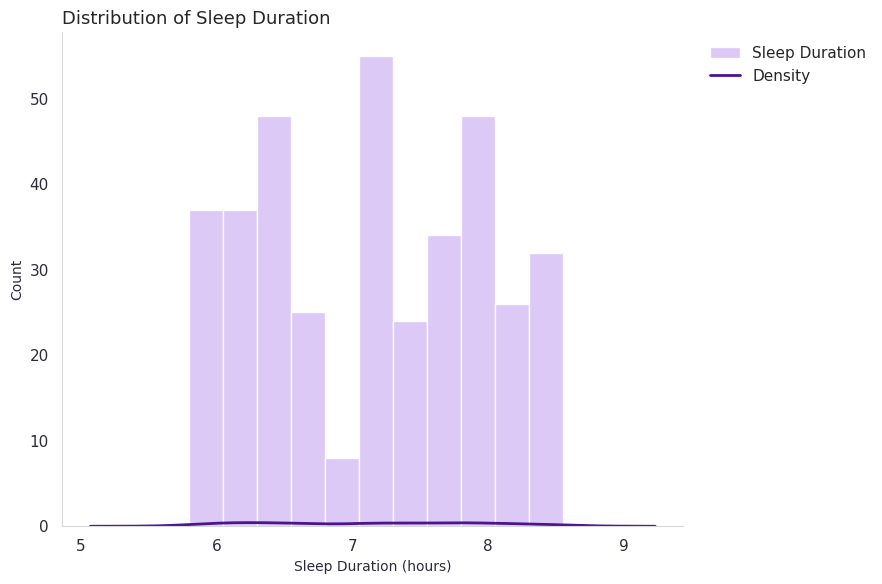

In [424]:
fig, ax = plt.subplots(figsize=(9,6))
bins = np.arange(lavdrm["sleep_duration"].min(), lavdrm["sleep_duration"].max()+0.25, 0.25)

ax.hist(lavdrm["sleep_duration"], bins=bins,
        color=LAV_BASE, edgecolor="white", alpha=0.9, label="Sleep Duration")

sns.kdeplot(lavdrm["sleep_duration"], ax=ax, color=LAV_ACC, linewidth=2, label="Density")

ax.set_title("Distribution of Sleep Duration", fontsize=13, weight="normal")
ax.set_xlabel("Sleep Duration (hours)")
ax.set_ylabel("Count")

plsh(ax)

ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0), frameon=False)

plt.tight_layout()
plt.show()

Lavender Dreams require a baseline: What does sleep duration look like across the average people? or whether most people meet the healthy sleep target of 7-8 hours or should the short sleeper be prioritized.

As we can see from the Histogram + KDE that the sleep duration of most individuals are concentrated between 6-8.5 hours with a hike visible between 7-7.5 hours which tells us that the distribution is healthy but there is a risk concentrated in the left tail.

This means that as much as people like to follow the strict healthy sleep routine, there are still people who fall under the sleep deprived category which is raising concern and are required to look upon as they may be prone to sleep disorders and need to be taken care of.

Sam falls under the category of low duration of sleep with his average being 6.2 hours sleep with reported trouble falling asleep and interrupted sleep.

* Action: Thus, we will focus interventions on short sleepers with consistent bedtime routines, lights out reminders etc

## 6.2. How is sleep affected by stress and vice-versa?

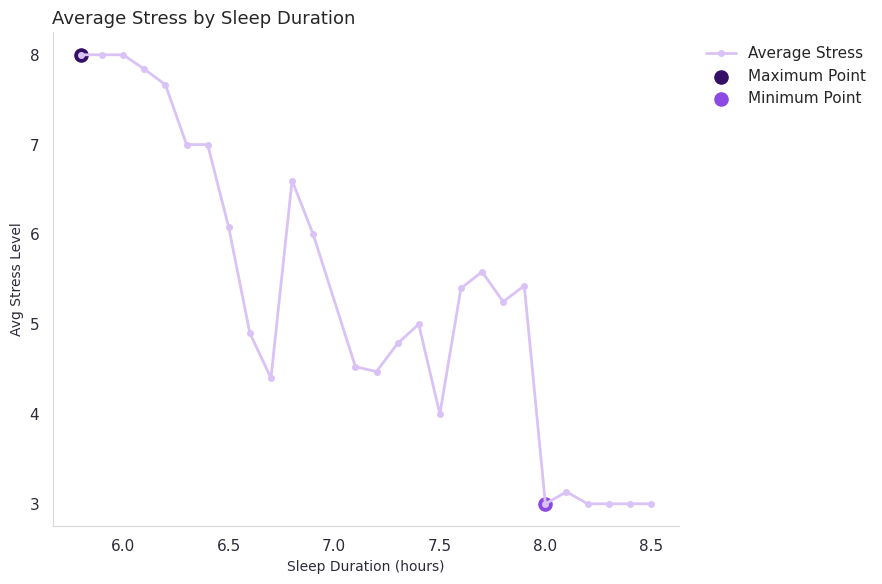

In [425]:
sleep_stress = (lavdrm.groupby("sleep_duration", observed=True)["stress_level"]
                  .mean().sort_index())
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(sleep_stress.index, sleep_stress.values,
        marker="o", markersize=4,
        color=LAV_BASE, linewidth=2, label="Average Stress")

idx_min, val_min = sleep_stress.idxmin(), sleep_stress.min()
idx_max, val_max = sleep_stress.idxmax(), sleep_stress.max()

ax.scatter([idx_max], [val_max], s=90, color="#350F66", zorder=1, label="Maximum Point")
ax.scatter([idx_min], [val_min], s=90, color="#8C49E4", zorder=1, label="Minimum Point")

ax.set_title("Average Stress by Sleep Duration", fontsize=13, weight="normal")
ax.set_xlabel("Sleep Duration (hours)")
ax.set_ylabel("Avg Stress Level")

plsh(ax)
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0), frameon=False)

plt.tight_layout()
plt.show()

To understand the effect of sleep on stress and the other way around we have plotted the line graph and as it shows very clearly that the peak stress occurs when the sleep duration is less and lowest stress is when sleep duration is more.

From this we can draw the logic that sleep duration is inversely proportional to stress level, with increasing sleep duration, stress level decreases and vice-versa.

Sam has reported high stress level due to work and life which justifies the low duration of sleep which eventually caused the sleeping disorder.

Also since from the previous graph we drew the fact that concentration of majority was from 6-8.5 hours, we have taken that amount of sleep duration here to ensure we only see useful data.

* Action: What step must be taken towards the individuals with higher stress level is to coach them to add half or an hour to their sleep and avoid caffeine and screens and ensure proper attention is provided to them.

## 6.3. Which occupations get less sleep on average?

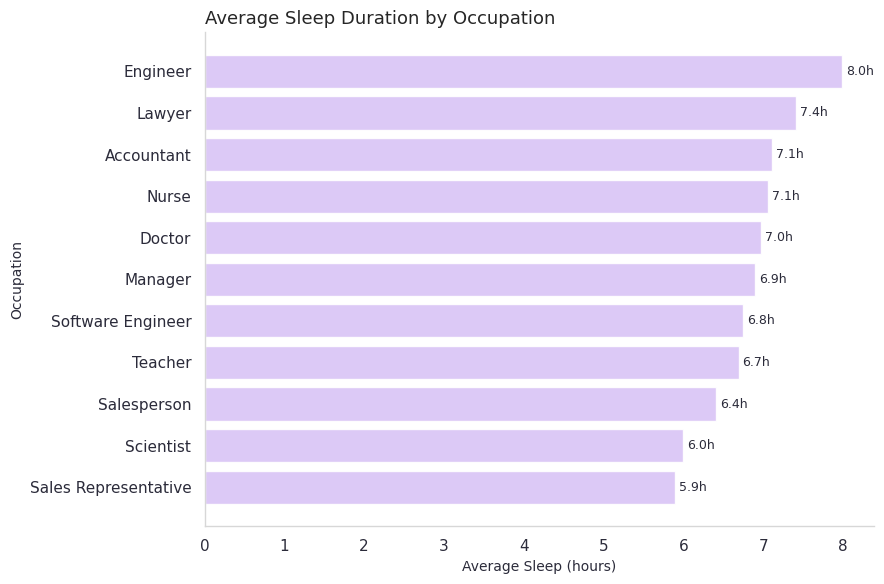

In [426]:
occ_sleep = (lavdrm.groupby("occupation", observed=True)["sleep_duration"]
               .mean()
               .sort_values(ascending=True))

fig, ax = plt.subplots(figsize=(9,6))

bars = ax.barh(occ_sleep.index, occ_sleep.values,
               color="#d9c3f6", alpha=0.9)

ax.set_title("Average Sleep Duration by Occupation", fontsize=13, weight="normal")
ax.set_xlabel("Average Sleep (hours)")
ax.set_ylabel("Occupation")

for spine in ["bottom","left"]:
    ax.spines[spine].set_color("#d7d7d7")
    ax.spines[spine].set_linewidth(1)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)

for p in bars:
    la = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(la + 0.05, y, f"{la:.1f}h",
            va="center", ha="left", fontsize=9, color=INK)

plt.tight_layout()
plt.show()

The horizontal bar graph very well shows which occupation gets most and least sleep. As much as it depends on person to person, the work they are associated with plays an equally important role.

As we can see from the graph, moving upwards from Doctors to Engineers take more sleep which is actually great and it frees them of any disorders but moving down from Manager to Sales Representative do not hit the healthy sleep mark which can tell us about the work life balance of an individual which is very essential for companies because if their employees are stressed or do not get enough sleep due to work, their productivity unwillingly goes down and they are most likely to falling ill frequently eventually affecting work and the company's value.

Sam faces the same issue, an engineer follows a proper work life balance and he works hard and comes back home and gets enough sleep so he's a healthy and happy individual who will work more actively than Sam who is a sales representative who works hard but does not have enough time for himself or to sleep and is not healthy and happy. This information is very crucial for a company as it tells them about how much pressure to put on which department and Sam can finally link to what is causing all the issues in his health.

* Action: Apply strict recovery windows after late shifts, ensure proper work-rest duration is followed, enforce ground rules including mandatory 1 hour rest after working 6 hours and measure change after quite some time of following the rules.

## 6.4. How does sleep differ by BMI category?

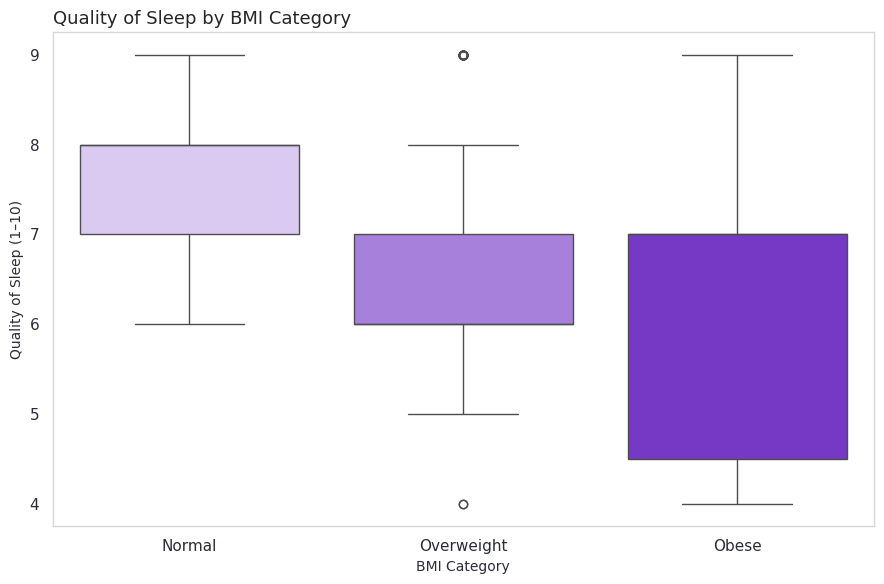

In [427]:
ord_bmi = ["Normal", "Overweight", "Obese"]

lavdrm["bmi_category"] = (
    lavdrm["bmi_category"]
        .astype(str).str.strip()
        .replace({"Over Weight": "Overweight", "overweight":"Overweight",
                  "obese":"Obese", "normal":"Normal"})
        .astype("category")
        .cat.set_categories(ord_bmi, ordered=True)
        .cat.remove_unused_categories()
)

df_plot = lavdrm.dropna(subset=["bmi_category", "quality_of_sleep"])

plt.figure(figsize=(9,6))
ax = sns.boxplot(
    data=df_plot,
    x="bmi_category", y="quality_of_sleep",
    order=ord_bmi,
    hue="bmi_category", hue_order=ord_bmi,
    dodge=False,
    palette=[LAV_BASE, LAV_MID, LAV_DEEP],
    legend=False
)

ax.set_title("Quality of Sleep by BMI Category", loc="left", fontsize=13, weight="normal")
ax.set_xlabel("BMI Category")
ax.set_ylabel("Quality of Sleep (1–10)")

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("#d7d7d7")
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

Just knowing the sleep duration is not enough, knowing how sleep differs by BMI is equally important as BMI is correlated with sleeping problems and quality of sleep directly tells how healthy the sleep is.

The boxplot clearly tells us the story of individuals with high Body Mass Index or Obesity showing how their quality of sleep significantly decreases. As we can see from the graph the BMI increases from Normal to Overweight to Obese with the sleep quality gradually decreasing implying that normal weighted individuals have high quality of sleep however overweight or obese individuals have trouble sleeping or do not get a healthy long sleep.

Sam, as reported as overweight has also understood that diet alone is not sufficient for weight management but having enough amount of sleep helps the body repair and be healthy however since Sam does not get good sleep it has also affected his health and turned him overweight.

* Action: Pair proper diet and weight management support with proper sleep routine ensuring healthy and timely diet followed by mandatory fixed sleep schedule.

## 6.5. How many people go through sleep disorders?

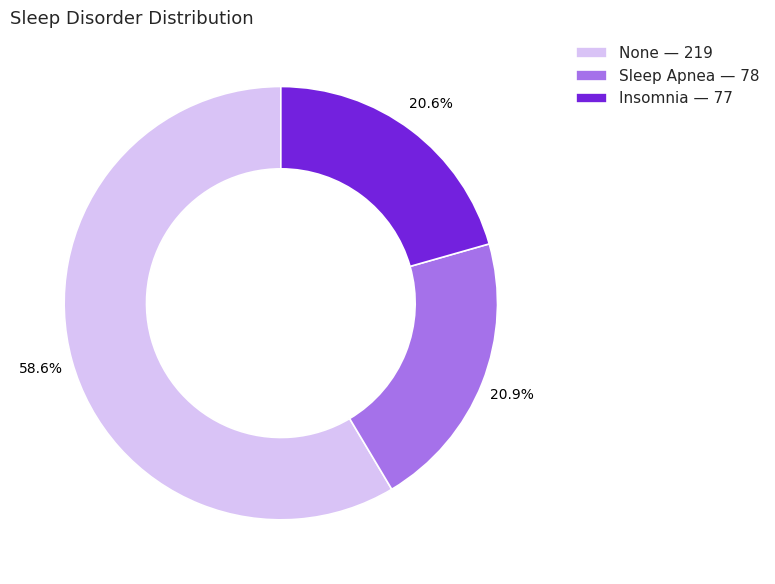

In [428]:
counts = lavdrm["sleep_disorder"].value_counts()

legend_labels = [f"{name} — {cnt}" for name, cnt in zip(counts.index, counts.values)]

fig, ax = plt.subplots(figsize=(9,6))

wedges, _texts, autotexts = ax.pie(
    counts.values,
    labels=None,
    startangle=90,
    autopct=lambda p: f"{p:.1f}%",
    pctdistance=1.15,
    colors=[LAV_BASE, LAV_MID, LAV_DEEP],
    wedgeprops={"width": 0.38, "edgecolor": "white", "linewidth": 1.2}
)

for at in autotexts:
    at.set(size=10, color="black")

ax.legend(
    wedges, legend_labels,
    loc="upper left", bbox_to_anchor=(1.02, 1.0),
    frameon=False
)

ax.set_title("Sleep Disorder Distribution", fontsize=13, weight="normal", loc="left")
ax.set_aspect("equal")

plt.tight_layout()
plt.show()

To plan resources it is important to understand what disorder majority has.

As we can clearly see from the Donut graph, majority reported No Disorder which is a great thing however quite some amount of people reported to have sleep apnea and insomnia.

Sam as reported as insomniac falls under that category and has mentioned being unable to sleep due to stress repeatedly has caused this eventually which has now become hard for him to recover from.

* Action: Prioritise education for insomnia like stimulus control and keep an apnea referral path for the reported ones.

## 6.6. Do sleep disorders vary by gender?

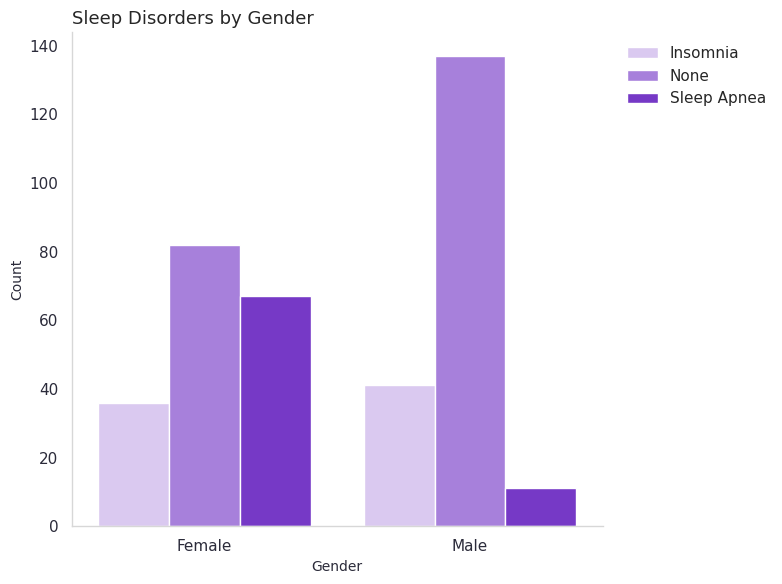

In [429]:
disorder_gender = (
    lavdrm.groupby(["gender","sleep_disorder"], observed=True)
      .size()
      .reset_index(name="count")
)

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(
    data=disorder_gender, x="gender", y="count", hue="sleep_disorder",
    palette=[LAV_BASE, LAV_MID, LAV_DEEP], ax=ax
)

ax.set_title("Sleep Disorders by Gender", fontsize=13, weight="normal")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")

for spine in ["bottom","left"]:
    ax.spines[spine].set_color("#d7d7d7")
    ax.spines[spine].set_linewidth(1)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)

ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0), frameon=False)

plt.tight_layout()
plt.show()

It is useful to understand whether disorders vary by genders as it also reflects that body and lifestyle variation affected the disorders as both genders follow different lifestyles.

As we can see from the grouped bar plot, insomnia is balanced among both genders however sleep apnea is seen significantly more in females as compared to males as most males has reported as no disorders. This tells us how different lifestyles can affect different sleeping disorders.

Sam being male also falls under the insomniac category showing how his stressful routine and lifestyle has resulted to this.

* Action: we will have to get apnea screening gender-aware, while keeping insomnia resources universal throughout.

## 6.7. Which lifestyle activities actually affect sleep duration or quality?

In [430]:
nm_cl = [
    "sleep_duration",
    "quality_of_sleep",
    "stress_level",
    "physical_activity_level",
    "heart_rate",
    "daily_steps",
]
short = {
    "sleep_duration": "SD",
    "quality_of_sleep": "QS",
    "stress_level": "SL",
    "physical_activity_level": "PA",
    "heart_rate": "HR",
    "daily_steps": "DS",
}
corr_short = (
    lavdrm[nm_cl]
    .corr(method="pearson")
    .round(2)
    .rename(index=short, columns=short)
)

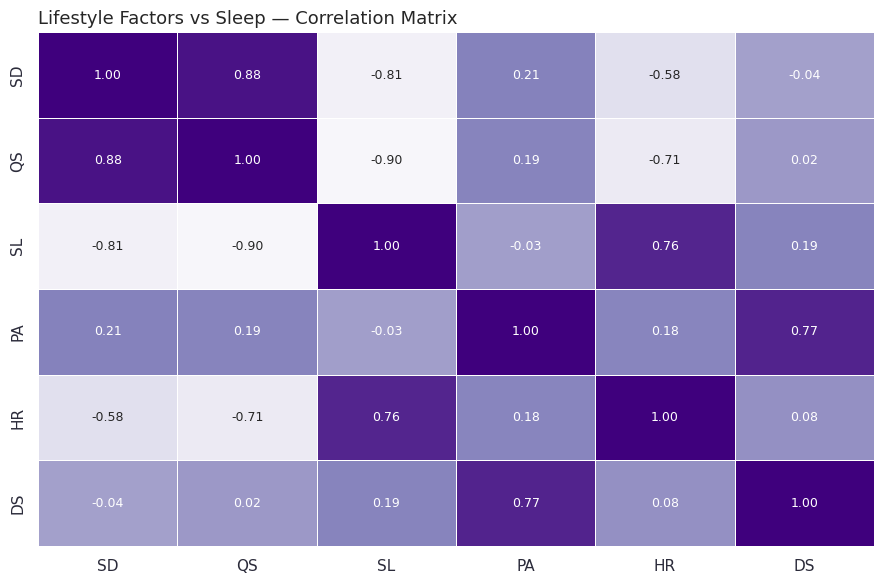

Legend:
SD = Sleep Duration
QS = Quality of Sleep
SL = Stress Level
PA = Physical Activity Level
HR = Heart Rate
DS = Daily Steps


In [431]:
plt.figure(figsize=(9,6))
ax = sns.heatmap(
    corr_short, annot=True, fmt=".2f",
    cmap="Purples", vmin=-1, vmax=1,
    linewidths=0.5, linecolor="white",
    annot_kws={"size":9},
    cbar=False
)

ax.set_title("Lifestyle Factors vs Sleep — Correlation Matrix",
             fontsize=13, weight="normal", loc="left")
plt.tight_layout()
plt.show()
print("Legend:\nSD = Sleep Duration\nQS = Quality of Sleep\nSL = Stress Level\nPA = Physical Activity Level\nHR = Heart Rate\nDS = Daily Steps")

A pearson correlation matrix with above mentioned short labels and cells ranging from -1 to +1: positive meaning move together and negative meaning move in opposite directions. Here we can draw the following insights:
* Dominant driver is Stress Level as SL-QS: -0.90 (strongest magnitude) and SL-SD: -0.81 meaning if stress level goes higher then quality of sleep and sleep duration go lower.
* HR-QS: -0.71 and HR-SD: -0.58 meaning higher heart rate foes with shorter and low quality sleep and HR-SL: +0.76 meaning high stress gets heart rate high
* PA-SL: -0.03 reduces stress so naturally will be positive with SD and QS (+0.21, +0.19) and same result with DS as physical activity includes daily steps.

Thus stress level clearly affects the porblem of low quality and duration of sleep and physical activity helps reduce it but not as significantly as stress increases it.

Sam has finally been able to understand how everything is linked together and what he must do to get out of it and lead a healthy lifestyle, he must start exercises and join workshops that help relieve stress and focus on healthy and long sleeping and a good diet to help him get back to his normal weight.

* Action: Prioritise stress reducing workshops, try encouraging yoga and breathing exercises. Keep monthly marathons or weekly steps challenges.

# 7. Conclusion

### 7.1. Strengths
* Clear data curation
* Visual have been kept aesthetic and minimal aligned with company
* Each plot answers a business question and ends with an action or solution

### 7.2. Limitations
* Blood pressure is not split (sys/dia)
* Rounded values like steps make raw scatter plots look like striped.
* Lots of missing values in sleep disorder

### 7.3. Recommendations
* Work on stress reduction
* Encourage insomnia first education
* Scheduled reviews to understand progress

Thus for Lavender Dreams the fastest path to help their customers (like Sam) to help lead a healthier life with better sleep is to help the reduce stress and follow proper work-life balance.